### p174 피마 인디언 당뇨병 예측

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,f1_score,confusion_matrix,precision_recall_curve,roc_curve,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [6]:
diabetes = pd.read_csv('diabetes.csv')

In [7]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
def get_clf_eval(y_test,pred,pred_proba):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f},정밀도:{precision:.4f},재현율:{recall:.4f},F1:{f1:.4f},auc:{auc:.4f}')
    
def precision_recall_curve_plot(y_test,pred_proba):
    precision,recall,thresholds = precision_recall_curve(y_test,pred_proba)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precision[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recall[0:threshold_boundary],label='recall')
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.legend()
    plt.grid()
    plt.show()
    
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds): #밑에 재현율 높이기 위해 추가
    from sklearn.preprocessing import Binarizer
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        get_clf_eval(y_test,custom_predict,pred_proba_c1)
        
# get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

In [28]:
X = diabetes.iloc[:,:-1] #[행,열] #앞부터 뒤에서 첫번째 앞까지
y = diabetes.iloc[:,-1] #뒤 첫번째꺼 하나만
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=156,
                                                stratify=y)
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도:0.7727,정밀도:0.7209,재현율:0.5741,F1:0.6392,auc:0.7919


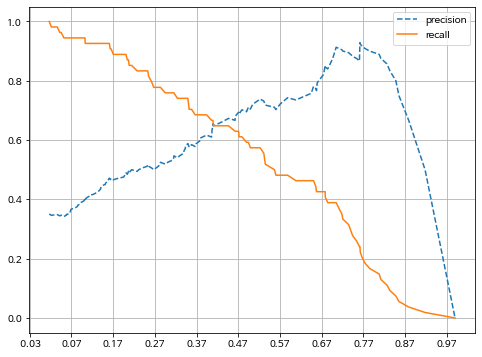

In [29]:
precision_recall_curve_plot(y_test,pred_proba)

In [30]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

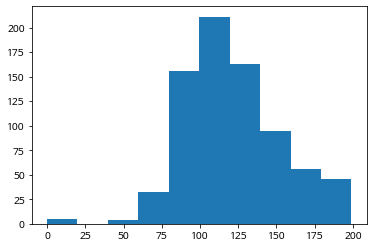

In [31]:
plt.hist(diabetes.Glucose)

In [39]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [40]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [42]:
total_count = diabetes.Glucose.count()
for feature in zero_features:
    zero_count = diabetes[diabetes[feature]==0][feature].count()
    print(f'{feature} 0 건수는 {zero_count}, 퍼센트:{zero_count/total_count*100:.2f}%') #소수이하 둘째자리까지

Glucose 0 건수는 5, 퍼센트:0.65%
BloodPressure 0 건수는 35, 퍼센트:4.56%
SkinThickness 0 건수는 227, 퍼센트:29.56%
Insulin 0 건수는 374, 퍼센트:48.70%
BMI 0 건수는 11, 퍼센트:1.43%


In [43]:
mean_zero_features = diabetes[zero_features].mean()
diabetes[zero_features] = diabetes[zero_features].replace(0,mean_zero_features)

In [44]:
X = diabetes.iloc[:,:-1] 
y = diabetes.iloc[:,-1] 
scaler = StandardScaler() #평균0, 분산1 인 형태로 조정
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,
                                                y,
                                                test_size=0.2,
                                                random_state=156,
                                                stratify=y)
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred,pred_proba)

#데이터 이상치에 대한 처리를 해서 성능이 훨씬 좋아짐

오차행렬
[[90 10]
 [21 33]]
정확도:0.7987,정밀도:0.7674,재현율:0.6111,F1:0.6804,auc:0.8433


In [46]:
#재현율 높이기
thresholds = [0.3,0.33,0.36,0.39,0.42,0.48,0.5]
get_eval_by_threshold(y_test,pred_proba.reshape(-1,1),thresholds)

#임계값 0.48일 때 F1값이 가장 높다.(좋음)

임계값: 0.3
오차행렬
[[67 33]
 [11 43]]
정확도:0.7143,정밀도:0.5658,재현율:0.7963,F1:0.6615,auc:0.8433
임계값: 0.33
오차행렬
[[72 28]
 [12 42]]
정확도:0.7403,정밀도:0.6000,재현율:0.7778,F1:0.6774,auc:0.8433
임계값: 0.36
오차행렬
[[76 24]
 [15 39]]
정확도:0.7468,정밀도:0.6190,재현율:0.7222,F1:0.6667,auc:0.8433
임계값: 0.39
오차행렬
[[78 22]
 [16 38]]
정확도:0.7532,정밀도:0.6333,재현율:0.7037,F1:0.6667,auc:0.8433
임계값: 0.42
오차행렬
[[84 16]
 [18 36]]
정확도:0.7792,정밀도:0.6923,재현율:0.6667,F1:0.6792,auc:0.8433
임계값: 0.48
오차행렬
[[88 12]
 [19 35]]
정확도:0.7987,정밀도:0.7447,재현율:0.6481,F1:0.6931,auc:0.8433
임계값: 0.5
오차행렬
[[90 10]
 [21 33]]
정확도:0.7987,정밀도:0.7674,재현율:0.6111,F1:0.6804,auc:0.8433


In [48]:
#임계값 0.48일 때 가장 좋으니 넣어서 다시
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba.reshape(-1,1))
get_clf_eval(y_test,pred_th_048,pred_proba)

오차행렬
[[88 12]
 [19 35]]
정확도:0.7987,정밀도:0.7447,재현율:0.6481,F1:0.6931,auc:0.8433
